In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [85]:
df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")

In [78]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [86]:
df = df.drop(['id'],axis=1)

In [87]:
df = df.drop(['International', 'Educational special needs'],axis=1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [50]:
df["Target"].unique()
df["Target"].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [82]:
encoder = LabelEncoder()
target = encoder.fit_transform(df['Target'])
df = df.drop(['Target'], axis = 1)

In [52]:
target

array([2, 0, 0, ..., 1, 0, 2])

In [53]:
np.unique(target, return_counts = True)

(array([0, 1, 2]), array([25296, 14940, 36282]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 10, shuffle = False)

In [55]:
df_test = df_test.drop(['International', 'Educational special needs'],axis=1)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
lr_acc = accuracy_score(lr_pred,y_test)
print(lr_acc*100)

lr_cr = classification_report(lr_pred,y_test)
print(lr_cr)

lr_cf = confusion_matrix(lr_pred,y_test)
print(lr_cf)

81.54077365394669
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4670
           1       0.55      0.62      0.58      2623
           2       0.92      0.84      0.88      8011

    accuracy                           0.82     15304
   macro avg       0.76      0.78      0.77     15304
weighted avg       0.83      0.82      0.82     15304

[[4140  371  159]
 [ 589 1630  404]
 [ 318  984 6709]]


In [40]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [41]:
rf_acc = accuracy_score(rf_pred ,y_test)
print(rf_acc*100)

rf_cr = classification_report(rf_pred ,y_test)
print(rf_cr)

rf_cf = confusion_matrix(rf_pred ,y_test)
print(rf_cf)

82.14845791949817
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4659
           1       0.58      0.63      0.60      2734
           2       0.92      0.85      0.88      7911

    accuracy                           0.82     15304
   macro avg       0.77      0.79      0.78     15304
weighted avg       0.83      0.82      0.82     15304

[[4162  383  114]
 [ 546 1720  468]
 [ 339  882 6690]]


In [18]:
testdata = scaler.transform(df_test)

In [22]:
df_test_withoutid = df_test.drop(['id'],axis=1)
Answers = xgbc.predict(df_test_withoutid)
Answers = encoder.inverse_transform(Answers)

In [23]:
id = df_test['id']

In [24]:
submission_df = pd.DataFrame(
{'id':id,
'target': Answers})

In [25]:
submission_df.to_csv('output.csv', index=False) 

In [51]:
submission_df

,id,target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [ ]:
from sklearn.model_selection import GridSearchCV

xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator= xgbc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   5.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   9.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=  12.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=  13.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; tot

In [14]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.8327833365141996


In [37]:
xgbc = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [26]:
xgbc_pred = xgbc.predict(X_test_scaled)

NameError: name 'X_test_scaled' is not defined

In [27]:
xgb_acc = accuracy_score(xgbc_pred ,y_test)
print(xgb_acc *100)

xgbc_cr = classification_report(xgbc_pred ,y_test)
print(xgbc_cr)

xgbc_cf = confusion_matrix(xgbc_pred ,y_test)
print(xgbc_cf)

82.91949817041296
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4727
           1       0.60      0.65      0.62      2748
           2       0.92      0.85      0.88      7829

    accuracy                           0.83     15304
   macro avg       0.78      0.80      0.79     15304
weighted avg       0.84      0.83      0.83     15304

[[4220  381  126]
 [ 494 1789  465]
 [ 333  815 6681]]


In [56]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
xgbc_pred = xgbc.predict(X_test)

In [58]:
xgb_acc = accuracy_score(xgbc_pred ,y_test)
print(xgb_acc *100)

xgbc_cr = classification_report(xgbc_pred ,y_test)
print(xgbc_cr)

xgbc_cf = confusion_matrix(xgbc_pred ,y_test)
print(xgbc_cf)

82.9652378463147
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4715
           1       0.60      0.65      0.62      2752
           2       0.92      0.85      0.89      7837

    accuracy                           0.83     15304
   macro avg       0.78      0.80      0.79     15304
weighted avg       0.84      0.83      0.83     15304

[[4213  381  121]
 [ 505 1790  457]
 [ 329  814 6694]]


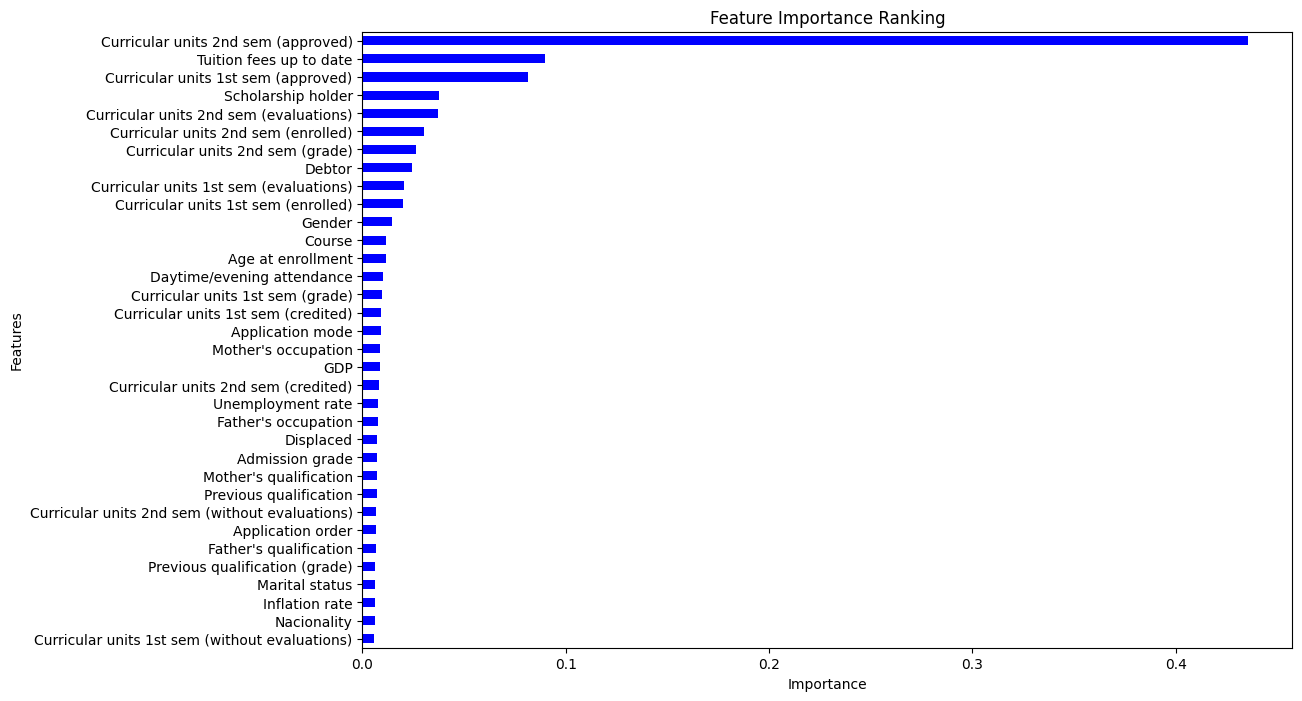

In [59]:
# Get feature importances
feature_importances = xgbc.feature_importances_

# Create a pandas series to store the feature importances with labels for easier plotting
import pandas as pd
importances = pd.Series(feature_importances, index= X_train.columns)

# Sort the feature importances
sorted_importances = importances.sort_values()

# Plot feature importances
plt.figure(figsize=(12,8))
sorted_importances.plot(kind='barh', color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

In [60]:
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61209,1,1,2,171,1,1,126.0,1,19,19,...,0,0,0,0,0,0.000000,0,13.9,-0.3,0.79
61210,1,1,1,9119,1,1,115.0,1,3,3,...,0,0,5,9,0,0.000000,0,12.4,0.5,1.79
61211,1,7,1,9119,1,3,130.0,1,3,3,...,0,0,5,5,0,0.000000,0,12.7,3.7,-1.70
61212,1,1,1,9773,1,1,134.0,1,19,19,...,0,0,6,6,6,12.833333,0,15.5,2.8,-4.06


In [ ]:


# Define the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param.Grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [102]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Display original class distribution
print(f"Original class distribution: {Counter(df['Target'])}")

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Convert back to DataFrame
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['Target'] = y_smote

# Display new class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(df_smote['Target'])}")




Original class distribution: Counter({2: 36282, 0: 25296, 1: 14940})
Class distribution after SMOTE: Counter({2: 36282, 0: 36282, 1: 36282})


In [ ]:
# Undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Convert back to DataFrame
df_rus = pd.DataFrame(X_rus, columns=X.columns)
df_rus['target'] = y_rus

# Display new class distribution after RandomUnderSampler
print(f"Class distribution after RandomUnderSampler: {Counter(df_rus['target'])}")

In [91]:
xgbco = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10, shuffle = False)

In [97]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [118]:
xgbco.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [113]:
y_smote

0         2
1         0
2         0
3         1
4         2
         ..
108841    1
108842    1
108843    1
108844    1
108845    1
Name: Target, Length: 108846, dtype: int64

In [119]:
xgbc_pred = xgbco.predict(X_test)

In [120]:
xgb_acc = accuracy_score(xgbc_pred ,y_test)
print(xgb_acc *100)

xgbc_cr = classification_report(xgbc_pred ,y_test)
print(xgbc_cr)

xgbc_cf = confusion_matrix(xgbc_pred ,y_test)
print(xgbc_cf)

25.833716123105187
              precision    recall  f1-score   support

           0       0.98      0.03      0.05     15117
           1       0.24      1.00      0.39      5204
           2       0.00      0.00      0.00      1449

    accuracy                           0.26     21770
   macro avg       0.41      0.34      0.15     21770
weighted avg       0.74      0.26      0.13     21770

[[  421 14696     0]
 [    1  5203     0]
 [    6  1443     0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
